# Educated data analysis

In [2]:
# Importing necessary libraries and packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize' :(12,10)})
pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Define the sheet names or indices to import
sheet_stats = ['CropStats']

# Import the sheets into a single DataFrame
df = pd.concat(pd.read_excel('../archive/food-twentieth-century-crop-statistics-1900-2017-xlsx.xlsx', sheet_name=sheet_stats))
df

Unnamed: 0  Harvest_year   admin0    admin1   crop  \
CropStats 0               0          1902  Austria       NaN  wheat   
          1               1          1903  Austria       NaN  wheat   
          2               2          1904  Austria       NaN  wheat   
          3               3          1905  Austria       NaN  wheat   
          4               4          1906  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  \
CropStats 0                NaN                  NaN  1902          1.310000   
          1                NaN                  NaN  1903          1.470000   
          2                NaN                  NaN  1904          1.270000   
          3                NaN                  NaN  1905          1.330000   
          4                NaN                  NaN  1906          1.280000   
...                        ...                  ...   ...               ...   
          36702        75520.0             278300.0  2013          3.685117   
          36703        82120.0             309500.0  2014          3.768875   
          36704        89800.0             351300.0  2015          3.912027   
          36705        76590.0             253900.0  2016          3.315054   
          36706       103670.0             419200.0  2017          4.043600   

                 admin2 notes  
CropStats 0         NaN   NaN  
          1         NaN   NaN  
          2         NaN   NaN  
          3         NaN   NaN  
          4         NaN   NaN  
...                 ...   ...  
          36702     NaN   NaN  
          36703     NaN   NaN  
          36704     NaN   NaN  
          36705     NaN   NaN  
          36706     NaN   NaN  

[36707 rows x 11 columns]

In [4]:
notes_values = df['notes'].dropna().tolist()

for value in notes_values:
    print(value)

FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country level data
FAO country

In [5]:
# Drop the columns notes and admin2 (not useful)
df = df.drop(columns=['notes', 'admin2'])
# Rename 'admin0' to 'Country' and 'admin1' to 'City'
df = df.rename(columns={'admin0': 'Country', 'admin1': 'City'})
df

Unnamed: 0  Harvest_year  Country      City   crop  \
CropStats 0               0          1902  Austria       NaN  wheat   
          1               1          1903  Austria       NaN  wheat   
          2               2          1904  Austria       NaN  wheat   
          3               3          1905  Austria       NaN  wheat   
          4               4          1906  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  
CropStats 0                NaN                  NaN  1902          1.310000  
          1                NaN                  NaN  1903          1.470000  
          2                NaN                  NaN  1904          1.270000  
          3                NaN                  NaN  1905          1.330000  
          4                NaN                  NaN  1906          1.280000  
...                        ...                  ...   ...               ...  
          36702        75520.0             278300.0  2013          3.685117  
          36703        82120.0             309500.0  2014          3.768875  
          36704        89800.0             351300.0  2015          3.912027  
          36705        76590.0             253900.0  2016          3.315054  
          36706       103670.0             419200.0  2017          4.043600  

[36707 rows x 9 columns]

In [6]:
print(df.isnull().sum())
df["City"].fillna("Not defined", inplace=True)

Unnamed: 0                0
Harvest_year              0
Country                   0
City                   2991
crop                      0
hectares (ha)          1623
production (tonnes)    1998
year                      0
yield(tonnes/ha)       2013
dtype: int64


In [7]:
# Fill the null values of hectares, production and yield with 0 to not miss any upon calculation
df.fillna(0, inplace=True)
print(df.isnull().sum())

Unnamed: 0             0
Harvest_year           0
Country                0
City                   0
crop                   0
hectares (ha)          0
production (tonnes)    0
year                   0
yield(tonnes/ha)       0
dtype: int64


In [8]:
df.shape

(36707, 9)

For our model we will be predicting the production based on the country, type of crop, yield, and hectares. Although production can be calculated mathematically from yield times hectares, it is different from one crop to another and from one country to another as well. First we will fill in the null values of production by this calculation. We can only do this if both yield and hectares are not null.

In [9]:
# Here we take out any rows that have production and (yield or hectars) 0
df = df[~((df['production (tonnes)'] == 0) & ((df['yield(tonnes/ha)'] == 0) | (df['hectares (ha)'] == 0)))]
print(df.shape)
df

(34097, 9)


Unnamed: 0  Harvest_year  Country         City   crop  \
CropStats 59             59          1961  Austria  Not defined  wheat   
          60             60          1962  Austria  Not defined  wheat   
          61             61          1963  Austria  Not defined  wheat   
          62             62          1964  Austria  Not defined  wheat   
          63             63          1965  Austria  Not defined  wheat   
...                     ...           ...      ...          ...    ...   
          36702       36702          2013    China     zhejiang  wheat   
          36703       36703          2014    China     zhejiang  wheat   
          36704       36704          2015    China     zhejiang  wheat   
          36705       36705          2016    China     zhejiang  wheat   
          36706       36706          2017    China     zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  
CropStats 59          275822.0                  0.0  1961          2.580000  
          60          270351.0                  0.0  1962          2.612000  
          61          274722.0                  0.0  1963          2.510000  
          62          282967.0                  0.0  1964          2.652000  
          63          275654.0                  0.0  1965          2.397000  
...                        ...                  ...   ...               ...  
          36702        75520.0             278300.0  2013          3.685117  
          36703        82120.0             309500.0  2014          3.768875  
          36704        89800.0             351300.0  2015          3.912027  
          36705        76590.0             253900.0  2016          3.315054  
          36706       103670.0             419200.0  2017          4.043600  

[34097 rows x 9 columns]

In [10]:
# Now to fill in the zero values in production
# Find the indexes of rows where 'production' is zero
zero_indexes = df[df['production (tonnes)'] == 0].index

# Loop through the zero valued indexes and calculate the missing 'production' values
for index in zero_indexes:
    df.at[index, 'production (tonnes)'] = df.at[index, 'yield(tonnes/ha)'] * df.at[index, 'hectares (ha)']

df

Unnamed: 0  Harvest_year  Country         City   crop  \
CropStats 59             59          1961  Austria  Not defined  wheat   
          60             60          1962  Austria  Not defined  wheat   
          61             61          1963  Austria  Not defined  wheat   
          62             62          1964  Austria  Not defined  wheat   
          63             63          1965  Austria  Not defined  wheat   
...                     ...           ...      ...          ...    ...   
          36702       36702          2013    China     zhejiang  wheat   
          36703       36703          2014    China     zhejiang  wheat   
          36704       36704          2015    China     zhejiang  wheat   
          36705       36705          2016    China     zhejiang  wheat   
          36706       36706          2017    China     zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  
CropStats 59          275822.0           711620.760  1961          2.580000  
          60          270351.0           706156.812  1962          2.612000  
          61          274722.0           689552.220  1963          2.510000  
          62          282967.0           750428.484  1964          2.652000  
          63          275654.0           660742.638  1965          2.397000  
...                        ...                  ...   ...               ...  
          36702        75520.0           278300.000  2013          3.685117  
          36703        82120.0           309500.000  2014          3.768875  
          36704        89800.0           351300.000  2015          3.912027  
          36705        76590.0           253900.000  2016          3.315054  
          36706       103670.0           419200.000  2017          4.043600  

[34097 rows x 9 columns]

In [11]:
# Count the number of rows with 0 in "production (tonnes)" to verify
count_zero_production = len(df[df['production (tonnes)'] == 0])
print("Number of rows with 0 in production:", count_zero_production)

Number of rows with 0 in production: 0


Now our production column is clean of null and zero values and we have the columns we believe would be good for making predictions. Let's do the same for yield and hectares since they can also be calculated.

In [12]:
# Here we take out any rows that have yield and (production or hectars) 0
# Some might argue that we should keep the row if the production has a value but yield doesn't, but in our case we need rows without zeros for a good prediction
df = df[~((df['yield(tonnes/ha)'] == 0) & ((df['production (tonnes)'] == 0) | (df['hectares (ha)'] == 0)))]
print(df.shape)
df
# Only 31 rows are taken out

(34066, 9)


Unnamed: 0  Harvest_year  Country         City   crop  \
CropStats 59             59          1961  Austria  Not defined  wheat   
          60             60          1962  Austria  Not defined  wheat   
          61             61          1963  Austria  Not defined  wheat   
          62             62          1964  Austria  Not defined  wheat   
          63             63          1965  Austria  Not defined  wheat   
...                     ...           ...      ...          ...    ...   
          36702       36702          2013    China     zhejiang  wheat   
          36703       36703          2014    China     zhejiang  wheat   
          36704       36704          2015    China     zhejiang  wheat   
          36705       36705          2016    China     zhejiang  wheat   
          36706       36706          2017    China     zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  
CropStats 59          275822.0           711620.760  1961          2.580000  
          60          270351.0           706156.812  1962          2.612000  
          61          274722.0           689552.220  1963          2.510000  
          62          282967.0           750428.484  1964          2.652000  
          63          275654.0           660742.638  1965          2.397000  
...                        ...                  ...   ...               ...  
          36702        75520.0           278300.000  2013          3.685117  
          36703        82120.0           309500.000  2014          3.768875  
          36704        89800.0           351300.000  2015          3.912027  
          36705        76590.0           253900.000  2016          3.315054  
          36706       103670.0           419200.000  2017          4.043600  

[34066 rows x 9 columns]

In [13]:
# Count the number of rows with 0 in "yield(tonnes/ha)" to verify
count_zero_yield = len(df[df['yield(tonnes/ha)'] == 0])
print("Number of rows with 0 in yield:", count_zero_yield)

Number of rows with 0 in yield: 0


No yield values that are 0 AND can be calculated

In [14]:
# Here we take out any rows that have hectares and (production or yields) 0
# Some might argue that we should keep the row if the production has a value but hectares doesn't, but in our case we need rows without zeros for a good prediction
df = df[~((df['hectares (ha)'] == 0) & ((df['production (tonnes)'] == 0) | (df['yield(tonnes/ha)'] == 0)))]
print(df.shape)
df
# No rows are taken out

(34066, 9)


Unnamed: 0  Harvest_year  Country         City   crop  \
CropStats 59             59          1961  Austria  Not defined  wheat   
          60             60          1962  Austria  Not defined  wheat   
          61             61          1963  Austria  Not defined  wheat   
          62             62          1964  Austria  Not defined  wheat   
          63             63          1965  Austria  Not defined  wheat   
...                     ...           ...      ...          ...    ...   
          36702       36702          2013    China     zhejiang  wheat   
          36703       36703          2014    China     zhejiang  wheat   
          36704       36704          2015    China     zhejiang  wheat   
          36705       36705          2016    China     zhejiang  wheat   
          36706       36706          2017    China     zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  
CropStats 59          275822.0           711620.760  1961          2.580000  
          60          270351.0           706156.812  1962          2.612000  
          61          274722.0           689552.220  1963          2.510000  
          62          282967.0           750428.484  1964          2.652000  
          63          275654.0           660742.638  1965          2.397000  
...                        ...                  ...   ...               ...  
          36702        75520.0           278300.000  2013          3.685117  
          36703        82120.0           309500.000  2014          3.768875  
          36704        89800.0           351300.000  2015          3.912027  
          36705        76590.0           253900.000  2016          3.315054  
          36706       103670.0           419200.000  2017          4.043600  

[34066 rows x 9 columns]

In [15]:
# Count the number of rows with 0 in "hectares (ha)" to verify
count_zero_hectares = len(df[df['hectares (ha)'] == 0])
print("Number of rows with 0 in hectares:", count_zero_hectares)

Number of rows with 0 in hectares: 106


We can see that we have 106 zero values that can be calculated for hectares.

In [16]:
# Now to fill in the zero values in hectares
# Find the indexes of rows where 'hectares' is zero
zero_indexes = df[df['hectares (ha)'] == 0].index

# Loop through the zero valued indexes and calculate the missing 'hectares' values
for index in zero_indexes:
    df.at[index, 'hectares (ha)'] = df.at[index, 'production (tonnes)'] / df.at[index, 'yield(tonnes/ha)']

df

Unnamed: 0  Harvest_year  Country         City   crop  \
CropStats 59             59          1961  Austria  Not defined  wheat   
          60             60          1962  Austria  Not defined  wheat   
          61             61          1963  Austria  Not defined  wheat   
          62             62          1964  Austria  Not defined  wheat   
          63             63          1965  Austria  Not defined  wheat   
...                     ...           ...      ...          ...    ...   
          36702       36702          2013    China     zhejiang  wheat   
          36703       36703          2014    China     zhejiang  wheat   
          36704       36704          2015    China     zhejiang  wheat   
          36705       36705          2016    China     zhejiang  wheat   
          36706       36706          2017    China     zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  
CropStats 59          275822.0           711620.760  1961          2.580000  
          60          270351.0           706156.812  1962          2.612000  
          61          274722.0           689552.220  1963          2.510000  
          62          282967.0           750428.484  1964          2.652000  
          63          275654.0           660742.638  1965          2.397000  
...                        ...                  ...   ...               ...  
          36702        75520.0           278300.000  2013          3.685117  
          36703        82120.0           309500.000  2014          3.768875  
          36704        89800.0           351300.000  2015          3.912027  
          36705        76590.0           253900.000  2016          3.315054  
          36706       103670.0           419200.000  2017          4.043600  

[34066 rows x 9 columns]

In [17]:
# Count the number of rows with 0 in "hectares (ha)" to verify
count_zero_hectares = len(df[df['hectares (ha)'] == 0])
print("Number of rows with 0 in hectares:", count_zero_hectares)

Number of rows with 0 in hectares: 0


Now our yields and hectares columnes are clean of null and zero values too. Let's check the data types of the columns and make sure they are numerical for production, yield and hectares so we can plot boxplots to check for outliers.

In [18]:
print(df.dtypes)

Unnamed: 0               int64
Harvest_year             int64
Country                 object
City                    object
crop                    object
hectares (ha)          float64
production (tonnes)    float64
year                     int64
yield(tonnes/ha)       float64
dtype: object


In [19]:
# Checking the number of unique values 
for column in df:
    unique_vals = df[column].unique()
    nr_values = len(unique_vals)
    print('The number of unique values for {} :{}'.format(column, nr_values))

The number of unique values for Unnamed: 0 :34066
The number of unique values for Harvest_year :155
The number of unique values for Country :25
The number of unique values for City :132
The number of unique values for crop :5
The number of unique values for hectares (ha) :16565
The number of unique values for production (tonnes) :25267
The number of unique values for year :155
The number of unique values for yield(tonnes/ha) :15801


In [20]:
df.describe()

,Unnamed: 0,Harvest_year,hectares (ha),production (tonnes),year,yield(tonnes/ha)
count,34066.000000,34066.000000,3.406600e+04,3.406600e+04,34066.000000,34066.000000
mean,18589.313715,1956.158398,6.609982e+05,1.638817e+06,1956.143398,2.686774
std,10185.308744,38.768519,1.574022e+06,5.008900e+06,38.764779,2.237899
min,59.000000,1861.000000,1.000000e+00,1.000000e+00,1861.000000,0.053289
25%,10099.250000,1927.000000,3.642120e+04,7.163931e+04,1927.000000,1.143275
50%,18637.500000,1960.000000,1.796779e+05,3.331156e+05,1960.000000,1.883041
75%,27161.750000,1989.000000,6.353476e+05,1.247154e+06,1989.000000,3.497077
max,36706.000000,2019.000000,3.147000e+07,1.342875e+08,2019.000000,17.168477


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 34066 entries, ('CropStats', 59) to ('CropStats', 36706)
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           34066 non-null  int64  
 1   Harvest_year         34066 non-null  int64  
 2   Country              34066 non-null  object 
 3   City                 34066 non-null  object 
 4   crop                 34066 non-null  object 
 5   hectares (ha)        34066 non-null  float64
 6   production (tonnes)  34066 non-null  float64
 7   year                 34066 non-null  int64  
 8   yield(tonnes/ha)     34066 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 3.5+ MB


In [25]:
df.columns

Index(['Unnamed: 0', 'Harvest_year', 'Country', 'City', 'crop',
       'hectares (ha)', 'production (tonnes)', 'year', 'yield(tonnes/ha)'],
      dtype='object')

In [26]:
# Select specific columns and reorder them
df = df[['City', 'Country', 'year', 'Harvest_year', 'crop', 'hectares (ha)', 'yield(tonnes/ha)', 'production (tonnes)']]
df

City  Country  year  Harvest_year   crop  \
CropStats 59     Not defined  Austria  1961          1961  wheat   
          60     Not defined  Austria  1962          1962  wheat   
          61     Not defined  Austria  1963          1963  wheat   
          62     Not defined  Austria  1964          1964  wheat   
          63     Not defined  Austria  1965          1965  wheat   
...                      ...      ...   ...           ...    ...   
          36702     zhejiang    China  2013          2013  wheat   
          36703     zhejiang    China  2014          2014  wheat   
          36704     zhejiang    China  2015          2015  wheat   
          36705     zhejiang    China  2016          2016  wheat   
          36706     zhejiang    China  2017          2017  wheat   

                 hectares (ha)  yield(tonnes/ha)  production (tonnes)  
CropStats 59          275822.0          2.580000           711620.760  
          60          270351.0          2.612000           706156.812  
          61          274722.0          2.510000           689552.220  
          62          282967.0          2.652000           750428.484  
          63          275654.0          2.397000           660742.638  
...                        ...               ...                  ...  
          36702        75520.0          3.685117           278300.000  
          36703        82120.0          3.768875           309500.000  
          36704        89800.0          3.912027           351300.000  
          36705        76590.0          3.315054           253900.000  
          36706       103670.0          4.043600           419200.000  

[34066 rows x 8 columns]

In [27]:
df.columns

Index(['City', 'Country', 'year', 'Harvest_year', 'crop', 'hectares (ha)',
       'yield(tonnes/ha)', 'production (tonnes)'],
      dtype='object')

In [28]:
# Defining the features that we want to check in boxplots
n_variables = ['year', 'hectares (ha)', 'yield(tonnes/ha)', 'production (tonnes)']

The median is:  1960.0
The mean is: 1956.143398109552


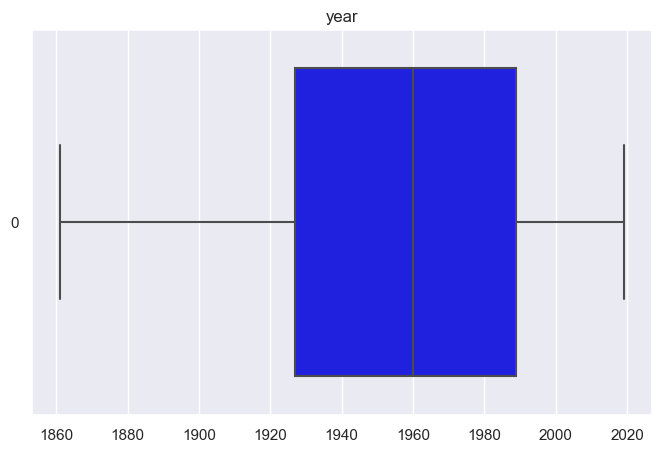

The median is:  179677.92
The mean is: 660998.1694192326


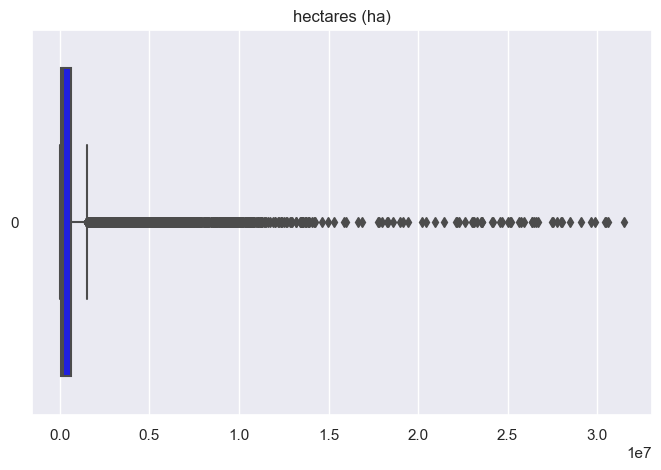

The median is:  1.883041353245194
The mean is: 2.6867739102923935


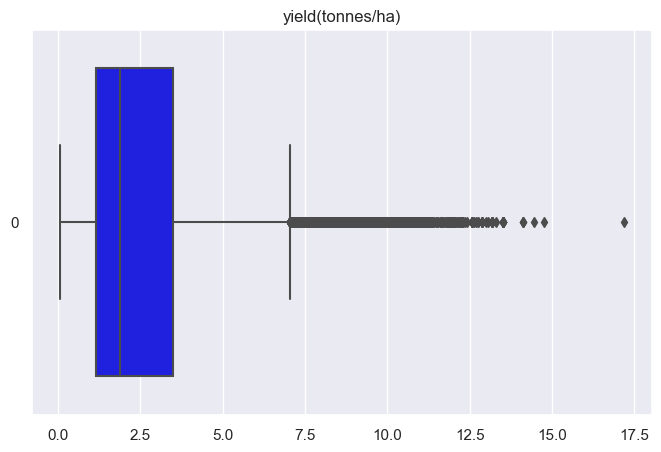

The median is:  333115.610711953
The mean is: 1638816.9535652723


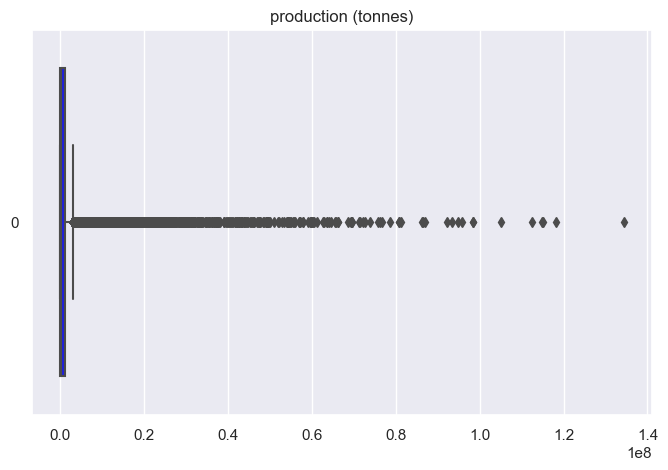

In [29]:
sns.set(rc={'figure.figsize':(8,5)})
for c in n_variables:
    x = df[c].values
    ax = sns.boxplot(x, orient='h', color= 'blue')
    print('The median is: ', df[c].median())
    print('The mean is:', df[c].mean())
    plt.title(c)
    plt.show()


We see that there's an enormous amount of outliers for production, hectares and yields. But in our case, this isn't a problem as we're looking at quantities of crops/land, so it's perfectly possible for there to be bigger/smaller numbers than the usual.

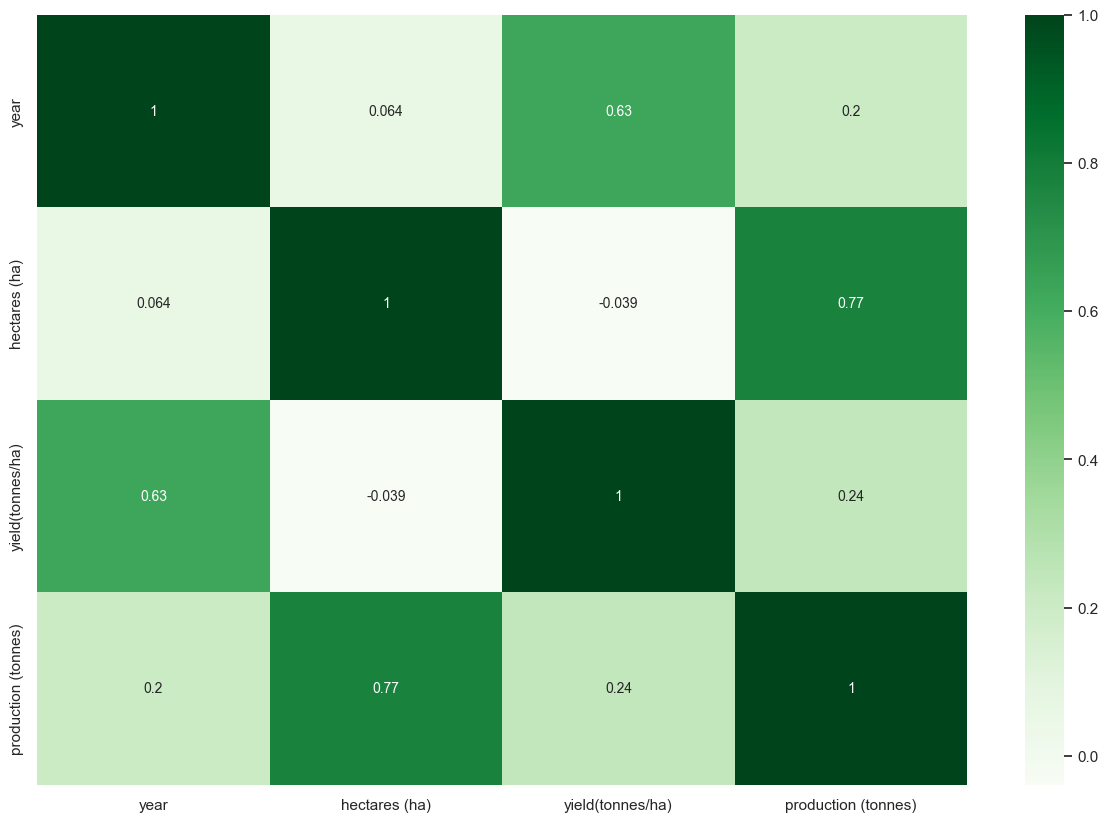

In [30]:
sns.set(rc={'figure.figsize':(15,10)})
pc =  df[n_variables].corr(method='pearson')
cols = n_variables
ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 10},
                 cmap="Greens")

Since this is going to be a regression problem (numbers), our target variable is production. We can see that it has a strong positive correlation with hectares, and a weak positive correlation with year and yield.

In [31]:
pc

,year,hectares (ha),yield(tonnes/ha),production (tonnes)
year,1.000000,0.063877,0.630259,0.200599
hectares (ha),0.063877,1.000000,-0.038934,0.773770
yield(tonnes/ha),0.630259,-0.038934,1.000000,0.236045
production (tonnes),0.200599,0.773770,0.236045,1.000000
